<span style="font-weight: bold; font-style: italic; color: red;">Entertainer Data Analysis</span>


# 1. Import Required Libraries

In [17]:
# Importing necessary libraries for the project
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic visualizations
import seaborn as sns  # For advanced visualizations
from datetime import datetime 

# Configuring visualizations to appear inline
%matplotlib inline

# 2. Load the Datasets

In [3]:
# Loading the three datasets
basic_info = pd.read_csv("Entertainer - Basic Info.csv")
breakthrough_info = pd.read_csv("Entertainer - Breakthrough Info.csv")
last_work_info = pd.read_csv("Entertainer - Last work Info.csv")

In [5]:
# Displaying the first few rows of each dataset to understand the structure
print("Basic Info Dataset:")
basic_info.head()

Basic Info Dataset:


,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922


In [7]:
print("\nBreakthrough Info Dataset:")
breakthrough_info.head()


Breakthrough Info Dataset:


,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0


In [9]:
print("\nLast Work Info Dataset:")
last_work_info.head()


Last Work Info Dataset:


,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN


# 3. Inspect and Understand the Data

In [13]:
# Checking the basic structure of each dataset
print("Basic Info Structure:")
basic_info.info()

print("\nBreakthrough Info Structure:")
breakthrough_info.info()

print("\nLast Work Info Structure:")
last_work_info.info()

Basic Info Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entertainer           70 non-null     object
 1   Gender (traditional)  70 non-null     object
 2   Birth Year            70 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB

Breakthrough Info Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 2   Breakthrough Name                             70 non-null     object 
 3   Year of First Oscar/Grammy/Emmy               64 non-null     fl

In [15]:
# Checking for missing values in each dataset
print("\nMissing Values in Basic Info:")
print(basic_info.isnull().sum())

print("\nMissing Values in Breakthrough Info:")
print(breakthrough_info.isnull().sum())

print("\nMissing Values in Last Work Info:")
print(last_work_info.isnull().sum())


Missing Values in Basic Info:
Entertainer             0
Gender (traditional)    0
Birth Year              0
dtype: int64

Missing Values in Breakthrough Info:
Entertainer                                     0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 6
dtype: int64

Missing Values in Last Work Info:
Entertainer                            0
Year of Last Major Work (arguable)     0
Year of Death                         40
dtype: int64


In [25]:
# Checking for duplicate values in each dataset
print("\nDuplicate Values in Basic Info:")
print(basic_info.duplicated().sum())

print("\nDuplicate Values in Breakthrough Info:")
print(breakthrough_info.duplicated().sum())

print("\nDuplicate Values in Last Work Info:")
print(last_work_info.duplicated().sum())


Duplicate Values in Basic Info:
0

Duplicate Values in Breakthrough Info:
0

Duplicate Values in Last Work Info:
0


# 4. Data Cleaning

In [27]:
# Dropping duplicates in all datasets
basic_info.drop_duplicates(inplace=True)
breakthrough_info.drop_duplicates(inplace=True)
last_work_info.drop_duplicates(inplace=True)

In [29]:
# Filling missing values if necessary 
breakthrough_info['Year of First Oscar/Grammy/Emmy'] = breakthrough_info['Year of First Oscar/Grammy/Emmy'].fillna(0000.0)
last_work_info['Year of Death'] = last_work_info['Year of Death'].fillna(0000.0)

In [31]:
# Merging the datasets using 'Name' as a common column
merged_data = pd.merge(basic_info, breakthrough_info, on='Entertainer', how='inner')
merged_data = pd.merge(merged_data, last_work_info, on='Entertainer', how='inner')

In [33]:
# Displaying the merged dataset structure
print("Merged Data Structure:")
print(merged_data.info())

Merged Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Gender (traditional)                          70 non-null     object 
 2   Birth Year                                    70 non-null     int64  
 3   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 4   Breakthrough Name                             70 non-null     object 
 5   Year of First Oscar/Grammy/Emmy               70 non-null     float64
 6   Year of Last Major Work (arguable)            70 non-null     int64  
 7   Year of Death                                 70 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.5+ KB
None


In [35]:
# Saving the cleaned dataset for Power BI
merged_data.to_csv("cleaned_entertainer_data.csv", index=False)

In [37]:
cleaned_entertainer_data = pd.read_csv("cleaned_entertainer_data.csv")
print("\nCleaned Entertainer Data:")
cleaned_entertainer_data.head()


Cleaned Entertainer Data:


,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,0.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,0.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,0.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,0.0


In [39]:
# Calculate 'Years Active' by subtracting 'Birth Year' from 'Year of Death' or current year
current_year = datetime.now().year

cleaned_entertainer_data['Years Active'] = cleaned_entertainer_data.apply(
    lambda x: current_year - x['Birth Year'] if x['Year of Death'] == 0 else x['Year of Death'] - x['Birth Year'],
    axis=1
)

In [105]:
# Saving the cleaned dataset for Power BI
cleaned_entertainer_data.to_csv("cleaned_entertainer_data.csv", index=False)

In [5]:
cleaned_entertainer_data = pd.read_csv("cleaned_entertainer_data.csv")
print("\nCleaned Entertainer Data:")
cleaned_entertainer_data.head()


Cleaned Entertainer Data:


,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death,Years Active,Age at Death
0,Adele,F,1988,2008,19,2009.0,2016,0.0,36.0,0.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,0.0,49.0,0.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,0.0,82.0,0.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0,81.0,81.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,0.0,102.0,0.0


# 5. Exploratory Data Analysis (EDA)

1. Number of Entertainers by Gender

In [31]:
# Count of entertainers by gender
gender_count = cleaned_entertainer_data['Gender (traditional)'].value_counts()
print("Number of Entertainers by Gender:")
print(gender_count)

Number of Entertainers by Gender:
Gender (traditional)
M    50
F    20
Name: count, dtype: int64


2. Breakthrough Year Analysis

In [111]:
# Count of entertainers by year of breakthrough
breakthrough_by_year = cleaned_entertainer_data['Year of Breakthrough/#1 Hit/Award Nomination'].value_counts().sort_index()
print("Number of Breakthroughs by Year:")
print(breakthrough_by_year)


Number of Breakthroughs by Year:
Year of Breakthrough/#1 Hit/Award Nomination
1915    1
1926    1
1928    1
1930    1
1931    1
1933    2
1934    3
1936    1
1938    2
1939    1
1940    1
1944    1
1948    1
1949    1
1951    2
1952    2
1953    1
1955    1
1956    1
1957    1
1958    1
1959    1
1961    2
1962    2
1963    3
1964    1
1965    1
1967    4
1968    1
1969    2
1972    2
1975    1
1977    1
1978    1
1979    1
1980    1
1982    1
1984    3
1985    1
1987    1
1988    1
1989    2
1990    2
1992    1
1994    1
1997    1
1999    1
2000    1
2001    1
2008    2
Name: count, dtype: int64


3. Average Age at Death (only for deceased entertainers)

In [18]:
# Calculate Age at Death
cleaned_entertainer_data['Age at Death'] = np.where(cleaned_entertainer_data['Year of Death'] > 0, cleaned_entertainer_data['Year of Death'] - cleaned_entertainer_data['Birth Year'], 0)

# Filter for deceased entertainers
deceased_data = cleaned_entertainer_data[cleaned_entertainer_data['Year of Death'] > 0]

# Calculate average age at death
average_age_at_death = deceased_data['Age at Death'].mean()
print(f"Average Age at Death: {average_age_at_death}")

Average Age at Death: 70.7


4. Trends in Breakthroughs by Gender

In [21]:
# Group by gender and year of breakthrough, and count the number of entertainers
breakthrough_by_gender = cleaned_entertainer_data.groupby(['Gender (traditional)', 'Year of Breakthrough/#1 Hit/Award Nomination']).size().unstack(fill_value=0)
print("Breakthroughs by Gender and Year:")
print(breakthrough_by_gender)

Breakthroughs by Gender and Year:
Year of Breakthrough/#1 Hit/Award Nomination  1915  1926  1928  1930  1931  \
Gender (traditional)                                                         
F                                                0     1     1     1     0   
M                                                1     0     0     0     1   

Year of Breakthrough/#1 Hit/Award Nomination  1933  1934  1936  1938  1939  \
Gender (traditional)                                                         
F                                                1     2     0     0     0   
M                                                1     1     1     2     1   

Year of Breakthrough/#1 Hit/Award Nomination  ...  1988  1989  1990  1992  \
Gender (traditional)                          ...                           
F                                             ...     0     0     1     0   
M                                             ...     1     2     1     1   

Year of Breakthrough/#1 Hit/Awa

# Visualizations using Python

1. Trends in Years Active

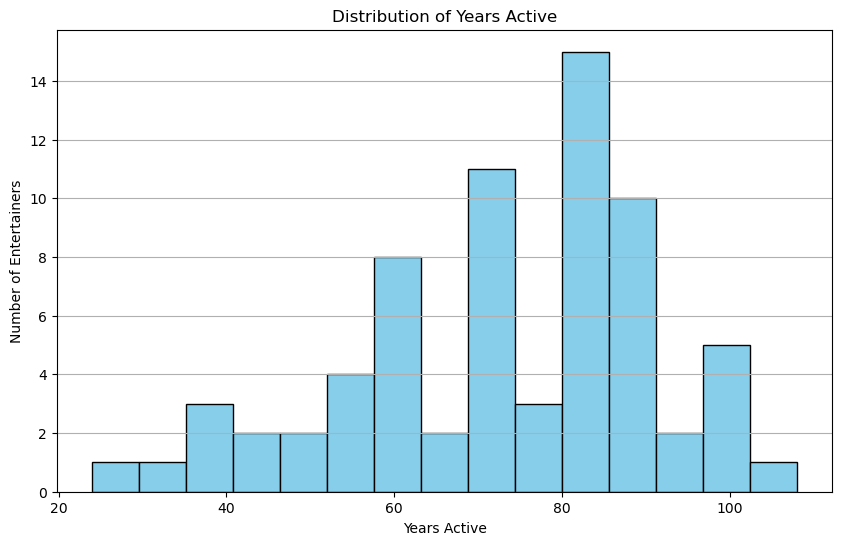

In [121]:
# Plot the distribution of 'Years Active' to see how long entertainers typically stay active

plt.figure(figsize=(10, 6))
plt.hist(cleaned_entertainer_data['Years Active'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Years Active")
plt.xlabel("Years Active")
plt.ylabel("Number of Entertainers")
plt.grid(axis='y')
plt.show()

2. Bar Chart for Gender Representation

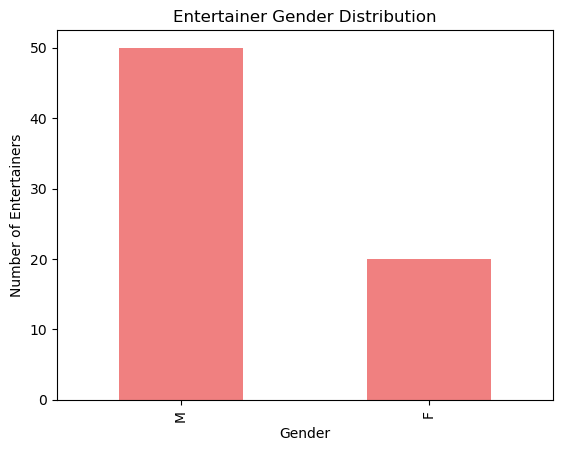

In [33]:
# Bar chart for gender distribution
gender_count.plot(kind='bar', color='lightcoral')
plt.title("Entertainer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Entertainers")
plt.show()


3. Line Chart for Trends in Breakthroughs by Year

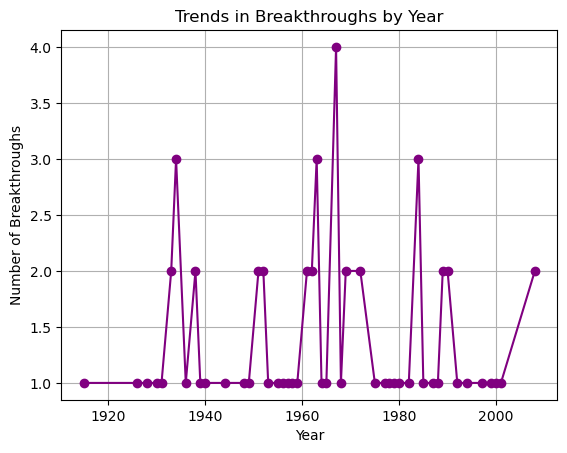

In [91]:
# Line chart for trends in breakthroughs by year
breakthrough_by_year.plot(kind='line', marker='o', color='purple')
plt.title("Trends in Breakthroughs by Year")
plt.xlabel("Year")
plt.ylabel("Number of Breakthroughs")
plt.grid(True)
plt.show()


4. Pie Chart for Gender Representation

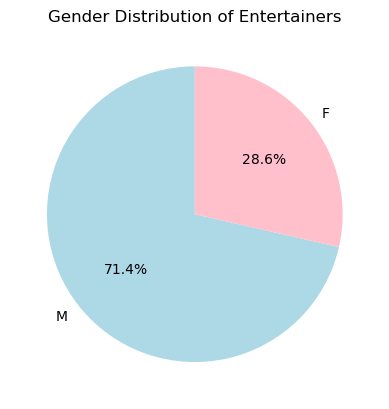

In [95]:
# Pie chart for gender distribution
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title("Gender Distribution of Entertainers")
plt.ylabel('')  # Remove the y-label
plt.show()


In [38]:
# Save cleaned data to CSV for further use or Power BI
cleaned_entertainer_data.to_csv("cleaned_entertainer_data.csv", index=False)

In [7]:
cleaned_entertainer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Gender (traditional)                          70 non-null     object 
 2   Birth Year                                    70 non-null     int64  
 3   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 4   Breakthrough Name                             70 non-null     object 
 5   Year of First Oscar/Grammy/Emmy               70 non-null     float64
 6   Year of Last Major Work (arguable)            70 non-null     int64  
 7   Year of Death                                 70 non-null     float64
 8   Years Active                                  70 non-null     float64
 9   Age at Death                                  70 non-null     float

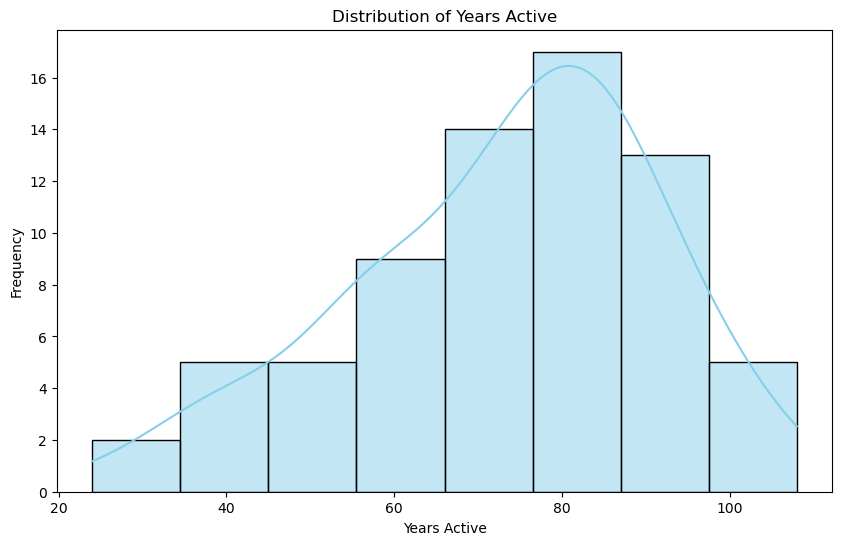

In [11]:
# Visualize the data distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_entertainer_data['Years Active'], kde=True, color='skyblue')
plt.title("Distribution of Years Active")
plt.xlabel("Years Active")
plt.ylabel("Frequency")
plt.show()

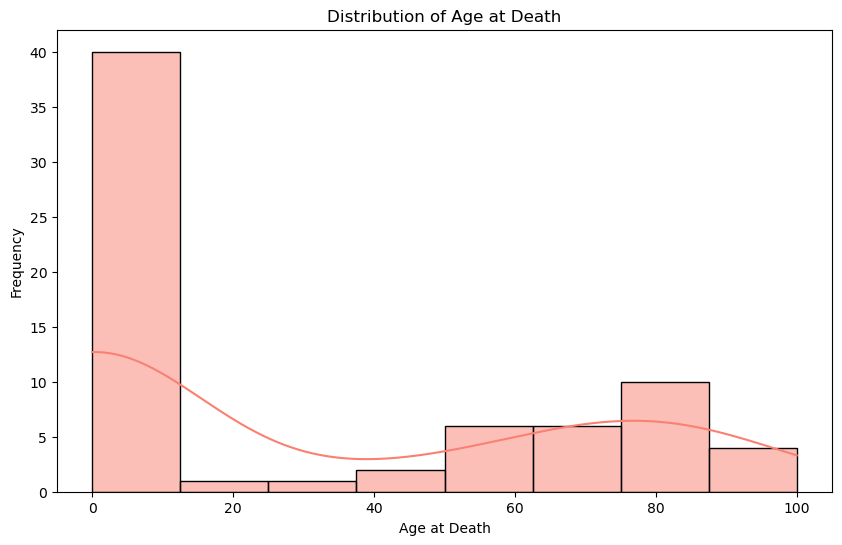

In [21]:
# Age at Death analysis
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_entertainer_data['Age at Death'], kde=True, color='salmon')
plt.title("Distribution of Age at Death")
plt.xlabel("Age at Death")
plt.ylabel("Frequency")
plt.show()

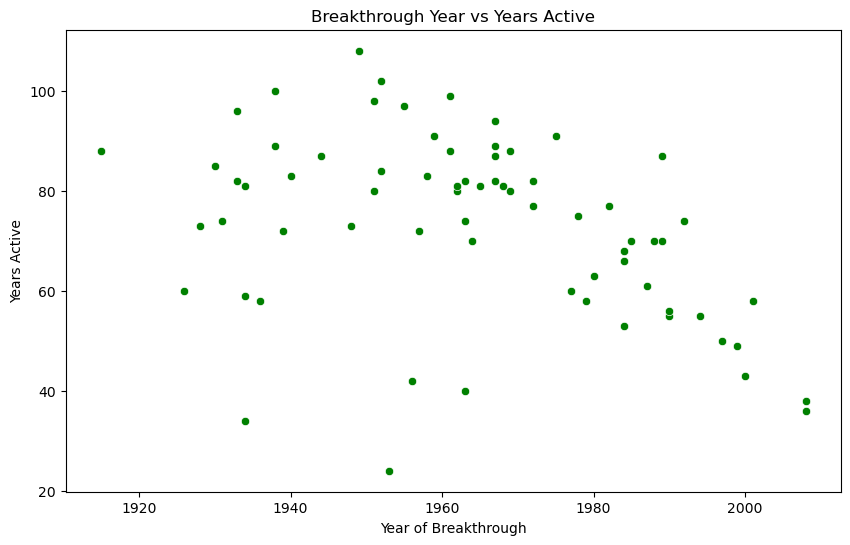

In [23]:
# Additional Analysis: Correlation between 'Year of Breakthrough' and 'Years Active'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_entertainer_data, x='Year of Breakthrough/#1 Hit/Award Nomination', y='Years Active', color='green')
plt.title("Breakthrough Year vs Years Active")
plt.xlabel("Year of Breakthrough")
plt.ylabel("Years Active")
plt.show()